In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (20.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and dir

In [2]:
plt.rc('font', family='NanumBarunGothic') 

In [3]:
df=pd.read_csv('/content/drive/MyDrive/colab/data/al-data.csv')

In [4]:
df=df.set_index('제품명')

In [ ]:
t_list=list(df['맛'].unique())
s_list=list(df['상황'].unique())
t_list

['소주', '부드러운', '카라멜', '과일', '허브', '시트러스', '달달', '스모키']

In [ ]:
op_list=[]
c=[]
for i in t_list:
  for j in s_list:
    c.append(df[(df['맛']==i)&(df['상황']==j)].shape[0])
    op_list.append(i+j)

In [ ]:
print(len(df['원산지'].unique()))
df['원산지'].unique()

16


array(['영국', '스코트랜드', '핀란드', '네덜란드', '미국', '독일', '쿠바', '멕시코', '푸에르토리코',
       '바베이도스', '프랑스', '스웨덴', '이탈리아', '캐나다', '한국', '러시아'], dtype=object)

In [ ]:
test2=pd.DataFrame(op_list,c).reset_index()
test2.columns=['count','cat']

In [5]:
def country(x):
  y=0
  if x=='영국':
    y=1
  elif x=='스코트랜드':
    y=2
  elif x=='프랑스':
    y=3
  elif x=='이탈리아':
    y=4
  elif x=='독일':
    y=5
  elif x=='핀란드':
    y=6
  elif x=='네덜란드':
    y=7
  elif x=='스웨덴':
    y=8
  elif x=='러시아':
    y=9
  elif x=='미국':
    y=10
  elif x=='캐나다':
    y=11
  elif x=='멕시코':
    y=12
  elif x=='쿠바':
    y=13
  elif x=='푸에르토리코':
    y=14
  elif x=='바베이도스':
    y=15
  elif x=='한국':
    y=16
  return y

In [6]:
df['원산지2']=df['원산지'].apply(country)

In [7]:
test1=df[['가격','도수','원산지2']]

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [9]:
sc=StandardScaler()
scdf=sc.fit_transform(test1)

In [10]:
scdf=pd.DataFrame(scdf)
kmeans=KMeans(n_clusters=6, random_state=0)
clusters=kmeans.fit(scdf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
test1['cluster']=clusters.labels_

<ipython-input-16-ac71b6430294>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['cluster']=clusters.labels_


In [ ]:
from os import sched_getaffinity
from sklearn.decomposition import PCA
X = scdf.copy()

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
x_pca = pca.transform(X)

In [ ]:
#x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df = pd.DataFrame(x_pca)
pca_df['cluster']=test1['cluster']
pca_df.head()

,0,1,cluster
0,-1.225795,-0.940179,NaN
1,-0.789123,-0.810697,NaN
2,-0.774754,-0.811707,NaN
3,-0.682691,-0.818180,NaN
4,-0.642779,-0.820986,NaN


In [ ]:
pca_df.index=test1.index

In [ ]:
pca_df.head()

,0,1,cluster
제품명,,,
길비스,-1.225795,-0.940179,NaN
칼라일,-0.789123,-0.810697,NaN
100 파이퍼스,-0.774754,-0.811707,NaN
탈리스만,-0.682691,-0.818180,NaN
패스포트,-0.642779,-0.820986,NaN


In [ ]:
pca_df.columns=['x','y','cluster']

In [ ]:
pca_df=pca_df.drop('cluster',axis=1)

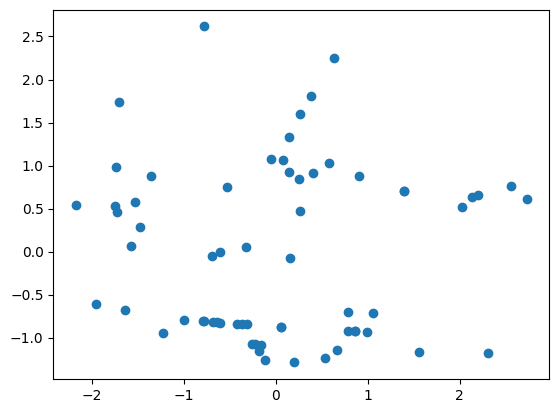

In [ ]:
plt.scatter(pca_df['x'],pca_df['y'])

In [ ]:
axs = sns.scatterplot('x', 'y',data=pca_df)

TypeError: ignored

In [ ]:
pca_df

,x,y
0,-1.225795,-0.940179
1,-0.789123,-0.810697
2,-0.774754,-0.811707
3,-0.682691,-0.818180
4,-0.642779,-0.820986
...,...,...
59,-0.531194,0.749533
60,0.078208,1.062761
61,-1.533308,0.571033
62,-1.706386,1.739336


In [ ]:
s_list

['퇴근', '승리', '연인', '위로', '축제', '기념', '세련', '기본', '감사']

# 진짜분류할거임

In [ ]:
pca_df.head()

,0,1,cluster
제품명,,,
길비스,-1.225795,-0.940179,NaN
칼라일,-0.789123,-0.810697,NaN
100 파이퍼스,-0.774754,-0.811707,NaN
탈리스만,-0.682691,-0.818180,NaN
패스포트,-0.642779,-0.820986,NaN


In [ ]:
pca_df=pca_df.drop('cluster', axis=1)
pca_df.columns=['x','y']

In [ ]:
pca_df=pca_df.reset_index()
pca_df2=pca_df

In [ ]:
pca_df2.head()

,제품명,x,y
0,길비스,-1.225795,-0.940179
1,칼라일,-0.789123,-0.810697
2,100 파이퍼스,-0.774754,-0.811707
3,탈리스만,-0.682691,-0.818180
4,패스포트,-0.642779,-0.820986


In [ ]:
a=[]
for i in range(pca_df.shape[0]):
  a=[]
  for j in range(pca_df.shape[0]):
    a.append(((pca_df['x'][i]-pca_df['x'][j])**2+(pca_df['y'][i]-pca_df['y'][j])**2))
  pca_df2[pca_df2['제품명'][i]]=a


In [ ]:
pca_df2.to_csv('/content/drive/MyDrive/colab/data/relation.csv')

In [ ]:
pca_df2=pca_df2.set_index('제품명')
pca_df2=pca_df2.drop('x', axis=1)
pca_df2=pca_df2.drop('y', axis=1)

In [ ]:
df.head()

,가격,도수,원산지,맛,상황,원산지2
제품명,,,,,,
길비스,10000,37.5,영국,소주,퇴근,1
칼라일,18000,40.0,스코트랜드,부드러운,퇴근,2
100 파이퍼스,18540,40.0,스코트랜드,카라멜,승리,2
탈리스만,22000,40.0,스코트랜드,부드러운,승리,2
패스포트,23500,40.0,스코트랜드,부드러운,퇴근,2


In [ ]:
test2=df[(df['맛']=='스모키')|(df['상황']=='감사')]
test3=df[(df['맛']=='스모키')&(df['상황']=='감사')]
df[(df['맛']=='스모키')&(df['상황']=='감사')]

,가격,도수,원산지,맛,상황,원산지2
제품명,,,,,,
탈리스커,120000,45.8,스코트랜드,스모키,감사,2


In [ ]:
a=test3.index[0]

In [ ]:
test1=pd.DataFrame(pca_df2[a]).sort_values(a)

In [ ]:
pd.merge(test1,test2, left_index=True, right_index=True, how='inner')

,탈리스커,가격,도수,원산지,맛,상황,원산지2
제품명,,,,,,,
탈리스커,0.000000,120000,45.8,스코트랜드,스모키,감사,2
탱커레이,0.567135,88000,47.3,스코트랜드,허브,감사,2
발렌타인 - 12년,1.781061,85000,40.0,스코트랜드,카라멜,감사,2
몽키숄더,2.152534,80000,40.0,스코트랜드,부드러운,감사,2
싱글톤 - 더프타운 12년,2.152534,80000,40.0,스코트랜드,카라멜,감사,2
조니워커 - 블랙라벨,2.392494,77000,40.0,스코트랜드,스모키,기본,2
시바스 리갈 - 12년,2.684245,75000,40.0,영국,부드러운,감사,1
와일드 터키 - 101,2.969817,80000,50.5,미국,스모키,기념,10
옐로우로즈,3.309979,95000,46.0,미국,스모키,승리,10


In [ ]:

test2.head()

,가격,도수,원산지,맛,상황,원산지2
제품명,,,,,,
길비스,10000,37.5,영국,소주,퇴근,1
핀란디아,26500,40.0,핀란드,소주,퇴근,6
볼스 피치,28000,17.0,네덜란드,과일,연인,7
딥에디 - 오리지널,35000,40.0,미국,소주,위로,10
딥에디 - 스위트 티,40000,35.0,미국,달달,연인,10


# 이번에는 수가 부족한 애들을 분류하겠습니다.

In [8]:
df.head()

,가격,도수,원산지,맛,상황,원산지2
제품명,,,,,,
길비스,10000,37.5,영국,소주,퇴근,1
칼라일,18000,40.0,스코트랜드,부드러운,퇴근,2
100 파이퍼스,18540,40.0,스코트랜드,카라멜,승리,2
탈리스만,22000,40.0,스코트랜드,부드러운,승리,2
패스포트,23500,40.0,스코트랜드,부드러운,퇴근,2


In [148]:
test1=df[(df['맛']=='스모키')|(df['상황']=='감사')]
test1=test1[['가격','원산지2','도수']]
test1.head()

,가격,원산지2,도수
제품명,,,
블랙바틀,36000,2,40.0
듀어스 - 화이트 라벨,41500,1,40.0
옐로우로즈,95000,10,46.0
발렌타인 - 파이니스트,50000,2,40.0
버팔로 트레이스,70000,10,45.0


In [149]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [150]:
sc=StandardScaler()
scdf=sc.fit_transform(test1)

In [151]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scdf, 'average')

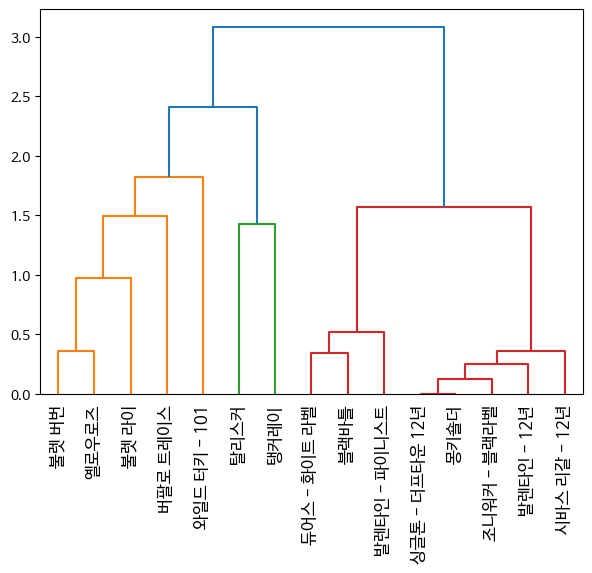

In [152]:
labelList = test1.index

plt.figure(figsize=(7, 5))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.xticks(rotation=90)
plt.show()

In [153]:
pd.merge(test1,df, left_index=True, right_index=True, how='inner')

,가격_x,원산지2_x,도수_x,가격_y,도수_y,원산지,맛,상황,원산지2_y
제품명,,,,,,,,,
블랙바틀,36000,2,40.0,36000,40.0,스코트랜드,스모키,기념,2
듀어스 - 화이트 라벨,41500,1,40.0,41500,40.0,영국,스모키,기본,1
옐로우로즈,95000,10,46.0,95000,46.0,미국,스모키,승리,10
발렌타인 - 파이니스트,50000,2,40.0,50000,40.0,스코트랜드,스모키,기념,2
버팔로 트레이스,70000,10,45.0,70000,45.0,미국,스모키,위로,10
시바스 리갈 - 12년,75000,1,40.0,75000,40.0,영국,부드러운,감사,1
조니워커 - 블랙라벨,77000,2,40.0,77000,40.0,스코트랜드,스모키,기본,2
와일드 터키 - 101,80000,10,50.5,80000,50.5,미국,스모키,기념,10
몽키숄더,80000,2,40.0,80000,40.0,스코트랜드,부드러운,감사,2


In [ ]:
scdf=pd.DataFrame(scdf)
kmeans=KMeans(n_clusters=2, random_state=0)
clusters=kmeans.fit(scdf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
